[View in Colaboratory](https://colab.research.google.com/github/sohamkapare/ML/blob/master/SkiKit_ML.ipynb)

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np



In [4]:
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving pima-data.csv to pima-data.csv


In [6]:
import io

In [7]:
df = pd.read_csv(io.StringIO(uploaded['pima-data.csv'].decode('utf-8')))
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [8]:
df.shape

(768, 10)

In [9]:
df.isnull().values.any()

False

In [10]:
def plot_corr(df, size=11):
  corr= df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

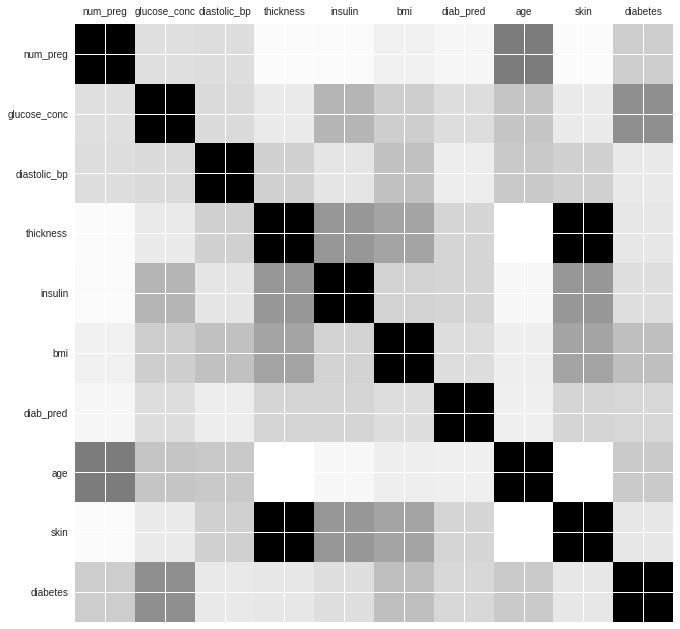

In [11]:
plot_corr(df)

In [12]:
del df['skin']

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


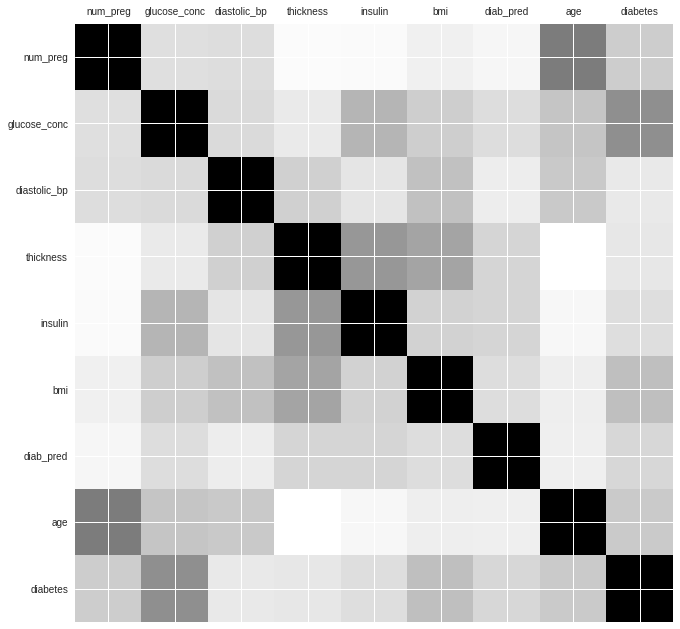

In [14]:
plot_corr(df)

In [15]:
diebetes_map = {True : 1, False : 0}

In [16]:
df['diabetes'] = df['diabetes'].map(diebetes_map)

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
from sklearn.cross_validation import train_test_split

feature_col_names=['num_preg',	'glucose_conc',	'diastolic_bp','thickness',	'insulin',	'bmi',	'diab_pred',	'age']
predicated_class_names= ['diabetes']

x=df[feature_col_names].values
y=df[predicated_class_names].values
split_test_size = 0.30

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=split_test_size, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn import preprocessing


In [24]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values=0, strategy="mean" ,axis=0 )

In [25]:
x_train = fill_0.fit_transform(x_train)

In [26]:
x_test = fill_0.fit_transform(x_test)

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()

In [29]:
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [30]:
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics 

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy: 0.7542


In [31]:
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics 

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy: 0.7359
